# **Analise e Aprimoramentos em uma Base de Dados sobre Funcionários de uma Empresa**


Vamos analisar os dados de funcionários de uma empresa multinacional não especificada, limpá-la e tirar insights relevantes \
Execute a célula abaixo para instalar a base de dados em `.xlsx`

# 1 - Instalação da Base de Dados

In [1]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=75e4a19feb39245c3e173d51b9d9dbcfcf32e1bd6b306b7731babc62c67f8609
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
import wget
# URL do arquivo Excel no GitHub
url = 'https://github.com/VictorCamolese/EBAC-DataAnalyticsProjects/raw/main/employee_project/employee_sample_data.xlsx'

arquivo = 'employee_sample_data.xlsx'

# Baixar o arquivo usando wget
wget.download(url, arquivo)


'employee_sample_data.xlsx'

# 2 - Primeiras impressões da Base de Dados

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_excel('employee_sample_data.xlsx')
data.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   EEID           1000 non-null   object        
 1   Full Name      1000 non-null   object        
 2   Job Title      1000 non-null   object        
 3   Department     1000 non-null   object        
 4   Business Unit  1000 non-null   object        
 5   Gender         1000 non-null   object        
 6   Ethnicity      1000 non-null   object        
 7   Age            1000 non-null   int64         
 8   Hire Date      1000 non-null   datetime64[ns]
 9   Annual Salary  1000 non-null   int64         
 10  Bonus %        1000 non-null   float64       
 11  Country        1000 non-null   object        
 12  City           1000 non-null   object        
 13  Exit Date      85 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(9)
memory usage: 109.5

## - 2.1 - Limpeza de Dados

- Limpeza de erros gramaticais no DF

In [5]:
list(set(data['Job Title']))

['Solutions Architect',
 'Manager',
 'Engineering Manager',
 'Test Engineer',
 'HRIS Analyst',
 'Controls Engineer',
 'Quality Engineer',
 'Computer Systems Manager',
 'Sr. Manger',
 'Analyst II',
 'Sr. Account Representative',
 'Network Engineer',
 'System Administrator\xa0',
 'Technical Architect',
 'Network Architect',
 'Sr. Business Partner',
 'Enterprise Architect',
 'Sr. Analyst',
 'Vice President',
 'Automation Engineer',
 'Account Representative',
 'IT Systems Architect',
 'Business Partner',
 'Field Engineer',
 'Director',
 'Cloud Infrastructure Architect',
 'IT Coordinator',
 'Operations Engineer',
 'Service Desk Analyst',
 'Analyst',
 'Systems Analyst',
 'Network Administrator',
 'Development Engineer']

In [6]:
data['Job Title'] = data['Job Title'].apply(lambda x: 'Sr. Manager' if x == 'Sr. Manger' else x)
data['Job Title'] = data['Job Title'].apply(lambda x: 'System Administrator' if x == 'System Administrator\xa0' else x)

- Simplificando algumas instancias

In [7]:
# male = 0 and female = 1
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'Female' else (0 if x == 'Male' else 2))

In [8]:
# verificando se temos instancias diferentes das esperadas em Gender
x=list(set(data['Gender']))
x

[0, 1]

In [9]:
data.head(3)

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manager,IT,Research & Development,1,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,0,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,1,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT


## 2.2 - Normalização de Colunas

---
**ATENÇÃO** - É melhor indicado a **NÃO NORMALIZAÇÃO** no momento para nos tópicos 3 termos informações mais claras. \
Normalização é indicado em casos de Machine Learning, conceito que ainda não está sendo utilizado neste Jupyter Book

---

- Normalizando a coluna *Age*

A normalização de variáveis numéricas é um processo comum em análise de dados e aprendizado de máquina. \
Esse processo envolve a transformação das variáveis numéricas para uma escala comum, geralmente entre **0 e 1**, a fim de garantir que elas tenham impacto semelhante em algoritmos de machine learning e análises estatísticas, independentemente de suas unidades originais ou escalas. \
\
 ***normalizacao = (x - minimo) / (maximo - minimo)***

In [10]:
data['Age'] = data['Age'].apply(lambda x: (x - data['Age'].min()) / (data['Age'].max() - data['Age'].min()))

- Normalizando a coluna *Annual Salary* com a biblioteca python `Sci-kit Learn`

o método **minmax_scale** é uma função que retorna a normalização de um conjunto de dados numéricos; \
Ela precisa ser aplicada a um conjunto de dados. \
Para normalizar a coluna 'Annual Salary' usando o **MinMaxScaler**, precisamos criar uma intância para iterar com o conjunto de dados:

In [11]:
from sklearn.preprocessing import MinMaxScaler as minmax_scale

# instancia do minmax
scaler = minmax_scale()

data['Annual Salary'] = scaler.fit_transform(data[['Annual Salary']])

- Normalizando a coluna *'Bonus &'*

In [12]:
data['Bonus %'] = scaler.fit_transform(data[['Bonus %']])
data.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manager,IT,Research & Development,1,Black,0.750,2016-04-08,0.464857,0.375,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,0,Asian,0.850,1997-11-29,0.274278,0.000,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,1,Caucasian,0.625,2006-10-26,0.563261,0.500,United States,Chicago,NaT
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,1,Caucasian,0.025,2019-09-27,0.205324,0.175,United States,Chicago,NaT
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,0,Asian,0.750,1995-11-20,0.253375,0.000,United States,Phoenix,NaT


---

## 2.3 - Criação e Manipulação de Colunas

In [10]:
df = data.drop(columns=['Full Name','City'])
df.head()

,EEID,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,Exit Date
0,E02387,Sr. Manager,IT,Research & Development,1,Black,55,2016-04-08,141604,0.15,United States,2021-10-16
1,E04105,Technical Architect,IT,Manufacturing,0,Asian,59,1997-11-29,99975,0.00,China,NaT
2,E02572,Director,Finance,Speciality Products,1,Caucasian,50,2006-10-26,163099,0.20,United States,NaT
3,E02832,Computer Systems Manager,IT,Manufacturing,1,Caucasian,26,2019-09-27,84913,0.07,United States,NaT
4,E01639,Sr. Analyst,Finance,Manufacturing,0,Asian,55,1995-11-20,95409,0.00,United States,NaT


- Coluna **Years of service** \
Vamos definir os Exit Date nulos como o dia de hoje para calcular os anos de serviços de todos os funcionários. Após isso, retornamos os valores nulos

In [11]:
import datetime

# transformando os valores nulos na data de hoje
df['Exit Date'].fillna(pd.to_datetime(datetime.date.today()), inplace=True)
df.head()

# calculo de anos de servico
df['Years of Service'] = round((df['Exit Date'] - df['Hire Date']).dt.days / 365, 1)

# transformando novamente o que for == data de hoje em NaN
data_de_hoje = datetime.date.today()
df.loc[df['Exit Date'] == pd.to_datetime(data_de_hoje), 'Exit Date'] = np.nan

---
- Coluna **Hired** \
está coluna retornará: \
 0 == funcionário **não** mais contratado \
 1 == funcionário ainda contratado

In [12]:
# condicionando q caso instancia for nula == 0
df['Hired'] = df['Exit Date'].apply(lambda x: 0 if pd.notna(x) else 1)

In [13]:
df.head()

,EEID,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,Exit Date,Years of Service,Hired
0,E02387,Sr. Manager,IT,Research & Development,1,Black,55,2016-04-08,141604,0.15,United States,2021-10-16,5.5,0
1,E04105,Technical Architect,IT,Manufacturing,0,Asian,59,1997-11-29,99975,0.00,China,NaT,25.8,1
2,E02572,Director,Finance,Speciality Products,1,Caucasian,50,2006-10-26,163099,0.20,United States,NaT,16.9,1
3,E02832,Computer Systems Manager,IT,Manufacturing,1,Caucasian,26,2019-09-27,84913,0.07,United States,NaT,3.9,1
4,E01639,Sr. Analyst,Finance,Manufacturing,0,Asian,55,1995-11-20,95409,0.00,United States,NaT,27.8,1


## 2.4 - Categorizando Tipos de Funcionários

Vamos separar em categorias cada funcionário de acordo com o tempo de atividade na empresa: \
**vet** = Veterano \
**int** = Intermediário \
**new** = Novo \
\
Vamos criar uma função que aplique a filtragem das instancias, para depois aplicarmos no DataFrame

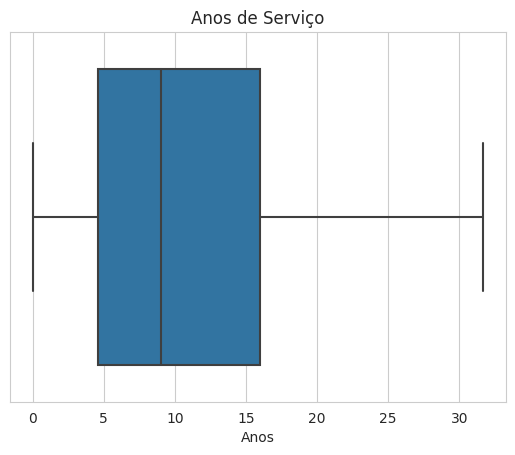

In [14]:
# verificando os anos de servico dos funcionarios da empresa
with sns.axes_style('whitegrid'):
  year_grafic = sns.boxplot(x=df['Years of Service'])
  year_grafic.set(title='Anos de Serviço', xlabel='Anos')

- A maioria dos funcionários acomulam/acomularam de 5 a 15 anos de permanência na empresa \
- A média varia de 9 a 10 anos \
\
Com isso, vamos supor que até 5 anos ainda é uma pessoa bem nova na empresa, enquanto acima de 15 anos de empresa já é alguem bem mais familiarizado com o seu trabalho e ambiente.

In [15]:
# criando a funcao de filtragem de categorias
def category_filter(years):
  if years <= 5:
    return 'new'
  elif years <= 15:
    return 'int'
  else:
    return 'vet'

In [16]:
# aplicando a funcao
df['Category'] = df['Years of Service'].apply(category_filter)
df.head()

,EEID,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,Exit Date,Years of Service,Hired,Category
0,E02387,Sr. Manager,IT,Research & Development,1,Black,55,2016-04-08,141604,0.15,United States,2021-10-16,5.5,0,int
1,E04105,Technical Architect,IT,Manufacturing,0,Asian,59,1997-11-29,99975,0.00,China,NaT,25.8,1,vet
2,E02572,Director,Finance,Speciality Products,1,Caucasian,50,2006-10-26,163099,0.20,United States,NaT,16.9,1,vet
3,E02832,Computer Systems Manager,IT,Manufacturing,1,Caucasian,26,2019-09-27,84913,0.07,United States,NaT,3.9,1,new
4,E01639,Sr. Analyst,Finance,Manufacturing,0,Asian,55,1995-11-20,95409,0.00,United States,NaT,27.8,1,vet


## 2.5 - Retoques na estrutura do DataFrame

Vamos fazer as ultimas manipulações para deixar o DF mais fácil de retirar informações uteis

- Renomeação de colunas \
- Ordenação do DF

In [17]:
# dict() para substituicao de colunas
columns_name = {'Job Title': 'Job',
               'Business Unit': 'Business',
               'Annual Salary': 'Salary',
               'Bonus %': 'Bonus'}
# aplicando o dict()
df = df.rename(columns=columns_name)

# reorganizando colunas
x = ['EEID','Job','Department','Business','Gender','Ethnicity','Age','Salary','Bonus','Country','Hire Date','Exit Date','Years of Service','Hired','Category']
df = df[x]

# reordenando o DF pelos departamentos
df = df.sort_values(by='Department')

In [18]:
df.head()

,EEID,Job,Department,Business,Gender,Ethnicity,Age,Salary,Bonus,Country,Hire Date,Exit Date,Years of Service,Hired,Category
999,E03545,Vice President,Accounting,Corporate,1,Asian,63,216195,0.31,United States,2020-07-26,NaT,3.1,1,new
274,E02555,Sr. Analyst,Accounting,Manufacturing,0,Latino,38,78056,0.00,Brazil,2008-07-05,NaT,15.2,1,vet
277,E02062,Analyst,Accounting,Research & Development,1,Latino,55,48687,0.00,Brazil,1996-06-26,NaT,27.2,1,vet
806,E04249,Vice President,Accounting,Corporate,1,Asian,47,243568,0.33,United States,2021-12-26,NaT,1.7,1,new
287,E00825,Sr. Analyst,Accounting,Corporate,1,Latino,41,70165,0.00,United States,2016-06-12,NaT,7.2,1,int


# 3 - Análise de Dados: Identificação de Retenção de Funcionários

**Objetivo:** Analisar a retenção de funcionários na empresa ao longo do tempo e identificar os fatores que influenciam na permanência dos funcionários. \


## 3.1 - Análise da Retenção de Funcionários ao Longo do Tempo:

Calcule a taxa de retenção de funcionários a cada ano. Para isso, você pode agrupar os dados por ano e calcular a proporção de funcionários que permaneceram empregados em relação ao total de funcionários naquele ano.

In [19]:
# DF para manipulacao
df_fun_byear = df[['Hire Date','Hired','Category']].sort_values(by='Hire Date')

# criando coluna que contenha somente os anos e apagando Hire Date
df_fun_byear['Hire Year'] = df_fun_byear['Hire Date'].dt.year
df_fun_byear = df_fun_byear.drop(columns='Hire Date')

df_fun_byear.head(3)

,Hired,Category,Hire Year
906,1,vet,1992
876,1,vet,1992
127,1,vet,1992


In [22]:
# definindo a taxa de retencao de funcionarios por ano
retention_rate = df_fun_byear.groupby('Hire Year')['Hired'].mean()

Hire Year
1992    0.818182
1993    1.000000
1994    0.769231
1995    0.888889
1996    0.900000
Name: Hired, dtype: float64

## 3.2 - Visualização da Retenção de Funcionários:

Crie um gráfico de linha que mostre a taxa de retenção de funcionários ao longo dos anos. Isso ajudará a identificar tendências ao longo do tempo.


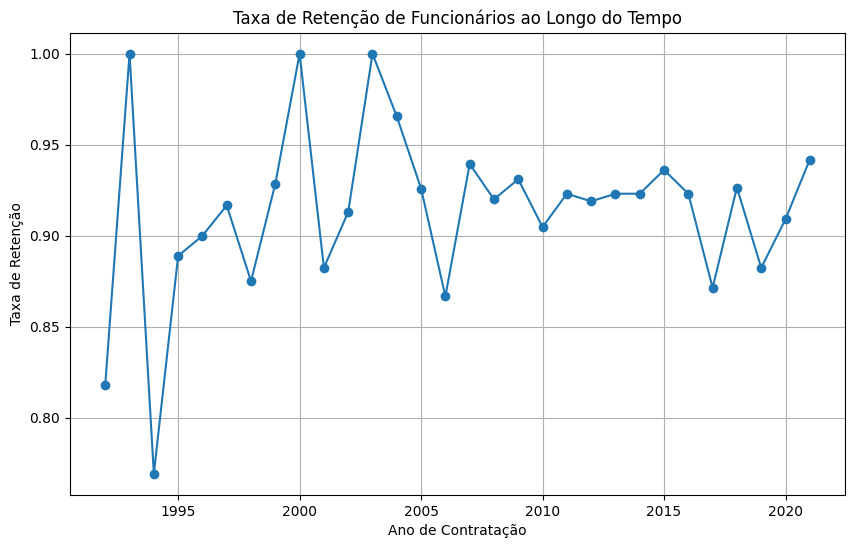

In [21]:
import matplotlib.pyplot as plt

# criando o grafico
plt.figure(figsize=(10, 6))
retention_rate.plot(kind='line', marker='o')
plt.xlabel('Ano de Contratação')
plt.ylabel('Taxa de Retenção')
plt.title('Taxa de Retenção de Funcionários ao Longo do Tempo')
plt.grid(True)

# salvando a imagem
plt.savefig('retention_rate.jpeg', format='jpeg')

# apresentando imagem
plt.show()

- a retenção de funcionários apresentou **maior estabilidade no período de 2011 para 2015**, onde apresentava inclusive uma gradativa subida na taxa de retenção.

- O início da empresa foi bem conturbado. Iniciou-se em 1992 e manteve todos - se não, a maioria - os funcionários até 1993; porém a maior queda da taxa foi no ano seguinte, **1994**, representando **a menor taxa de retenção** de funcionários na história da empresa. **Mostra uma provável dificuldade no desenvolvimento inicial da empresa**, seja por questões financeiras, política de empresa, infraestrutura... tais dificuldades que possam ter sido agravadas por estar no estágio inicial de desenvolvimento

- entre **2003 e 2006** a taxa de retenção de funcionários caiu em declive de formas seguidas ano a ano. Aparentemente fatores críticos relacionados a empresa influenciaram a saída agravante de funcionários. A grande quantidade de demissões/saídas durante esse período representa uma época de instabilidade na empresa, seja por motivos internos ou externos

-  Em 2007 a taxa foi aumentada e se manteve em certo período de estabilidade (principalmente a partir de 2010), com altos e baixos. Para tal, podemos supor que políticas internas, ambiente, salários ou outros fatores de grande influência possam ter sido alterados (isso por conta das baixas retenções nos anos anteriores), influenciando positivamente nos funcionários e tendenciando a permanência destes que estavam presentes em 2007

## 3.3 - Análise dos Fatores de Influência:

Realize análises para determinar se fatores como salário, categoria de funcionário, departamento, idade ou outros têm impacto na retenção de funcionários. Você pode usar técnicas de análise estatística, como testes de hipótese ou análise de regressão, para investigar esses fatores.


In [25]:
df.head(2)

,EEID,Job,Department,Business,Gender,Ethnicity,Age,Salary,Bonus,Country,Hire Date,Exit Date,Years of Service,Hired,Category
999,E03545,Vice President,Accounting,Corporate,1,Asian,63,216195,0.31,United States,2020-07-26,NaT,3.1,1,new
274,E02555,Sr. Analyst,Accounting,Manufacturing,0,Latino,38,78056,0.00,Brazil,2008-07-05,NaT,15.2,1,vet


In [27]:
statistics = df[['Salary', 'Age', 'Years of Service']].describe().round(1)
statistics

,Salary,Age,Years of Service
count,1000.0,1000.0,1000.0
mean,113217.4,44.4,10.8
std,53546.0,11.2,7.6
min,40063.0,25.0,0.0
25%,71430.2,35.0,4.6
50%,96557.0,45.0,9.0
75%,150782.2,54.0,16.0
max,258498.0,65.0,31.7


## 3.4 - Segmentação dos Funcionários:

Segmente os funcionários em grupos com base em características relevantes e analise a taxa de retenção em cada segmento. Por exemplo, compare a retenção entre funcionários novos e veteranos, funcionários de diferentes departamentos, ou funcionários com diferentes níveis de salário.

---

## 3.5 - Recomendações de Melhoria:

 Com base nas análises realizadas, ofereça recomendações à empresa para melhorar a retenção de funcionários, como ajustar políticas de remuneração, programas de treinamento ou estratégias de recrutamento.

-
